# Phase estimation algorithms
This notebook is devoted to phase estimation algorithm.
It starts with the direct phase estimation algorithms and then tests iterative phase estimation algorithm.

The standard phase estimation algorithm looks like this:
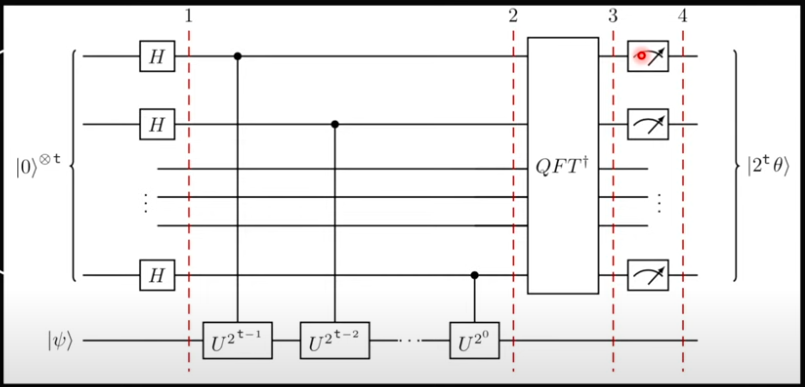

The algorithm is used to estimate a phase of the eigenvalue of the operator U. This assums that the magnitude of the eigenvalue is 1.

The result of the phase estimation is the upper t qubits after the IQFT.

The input to the operators U should be a eigenvalue of the operator U.

The phase \theta is represented as a number between 0 ant 1 (1 corresponds to 2pi phase). After measureing the resulting qubits state we get a binary number. Actually, this is the part of the binary number going after point. \theta = a_1 / 2 + a2 / 4 + a3 / 8 + ... a_t /2^(t-1) = 0. a1 a2 a3 .. a_t.

t defines the precision of the phase estimation.

In [11]:
import math

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

import sys
sys.path
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
import quantum_routines as qr

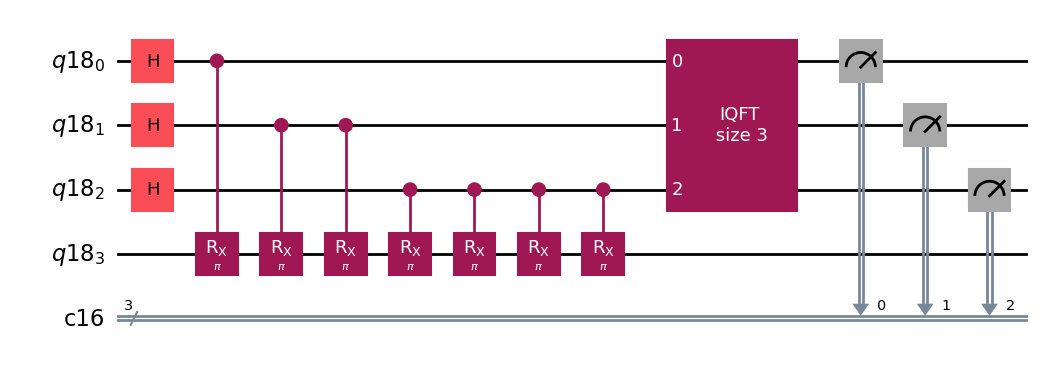

In [21]:
phase_precision = 3

u_size = 1

q_reg = Q_R(phase_precision + u_size)
cl_reg = C_R(phase_precision)

pe_circ = qiskit.QuantumCircuit(q_reg,cl_reg)

for i in range(phase_precision):
    pe_circ.h(q_reg[i])

gate = qiskit.circuit.library.RXGate(math.pi).control(1)

for i in range(phase_precision):
    q_list = [i, phase_precision + u_size - 1]
    for j in range(int(math.pow(2,i))):
        pe_circ.append(gate, q_list)

instr = qr.IQFTn_instr(phase_precision)
q_ins = []
for i in range(phase_precision):
    q_ins.append(q_reg[i])
pe_circ.append(instr, q_ins)

pe_circ = qr.qubits_meas(q_ins, cl_reg, pe_circ)

pe_circ.draw('mpl')

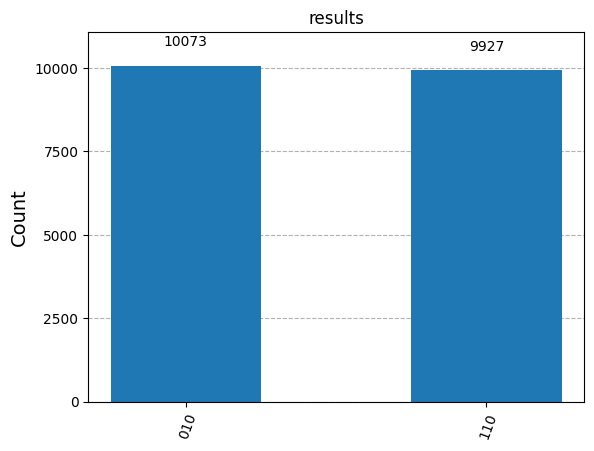

In [22]:
qr.plot_hyst_func(pe_circ,20000)